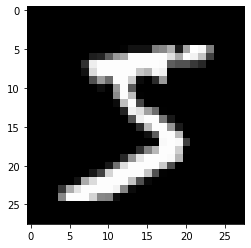

In [33]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap="gray")

In [34]:
x_train[0].shape

(28, 28)

In [35]:
28*28

784

In [36]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [37]:
# rescale to between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [38]:
encoder_input = keras.Input(shape=(28,28,1), name='img')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(256)(x)
encoder_output = keras.layers.Dense(128)(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256)(encoder_output)
x = keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(x)

decoder = keras.Model()

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

optimizer = keras.optimizers.Adam()
autoencoder.compile(optimizer, loss='mse')

autoencoder.summary()



Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_26 (Dense)             (None, 784)               201488    
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28, 1)         

In [42]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_split=.15)

Epoch 1/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 2/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 4/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 5/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 6/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0027 - val_loss: 0.0027

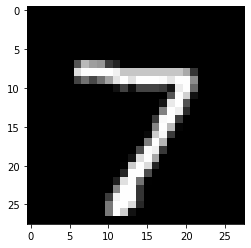

In [43]:
plt.imshow(x_test[0], cmap='gray')

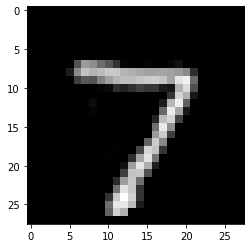

In [44]:
example = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
example.shape
plt.imshow(example, cmap='gray')

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=10)
fig.set_size_inches(15,6)
test_index = 0
for i in range (4):
    for j in range(10):
        while(y_test[test_index] != j):
            test_index += 1
        axis[i,j].axis('off')
        if i%2==0:
            axis[i,j].imshow(x_test[test_index], cmap='gray')
        else:
            pred = autoencoder.predict([x_test[test_index].reshape(-1,28,28,1)])[0]
            axis[i,j].imshow(pred, cmap='gray')
